# 한글화

In [1]:
#나눔 고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
set_matplotlib_formats('svg')

#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()
# 진행후에 런타임 다시시작
print("현재 설정 폰트",plt.rcParams['font.family'])

현재 설정 폰트 ['NanumBarunGothic']


# 데이터 

In [7]:
path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/cafeteria/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [8]:
train.shape, test.shape

((1205, 12), (50, 10))

In [9]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [10]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


#EDA

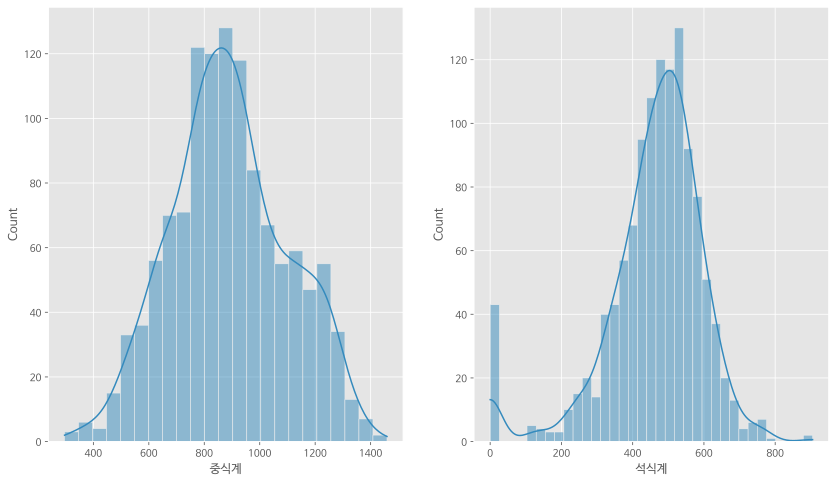

In [13]:
f, ax = plt.subplots(1,2, figsize=(14,8))
sns.histplot(data=train, x='중식계', ax=ax[0], kde=True)
sns.histplot(data=train, x='석식계', ax=ax[1], kde=True)

## 요일

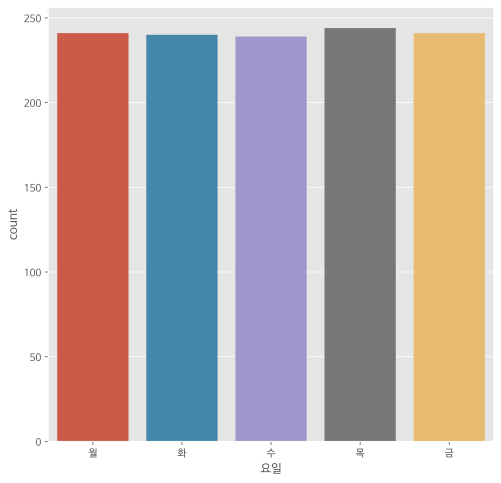

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(data=train, x='요일')

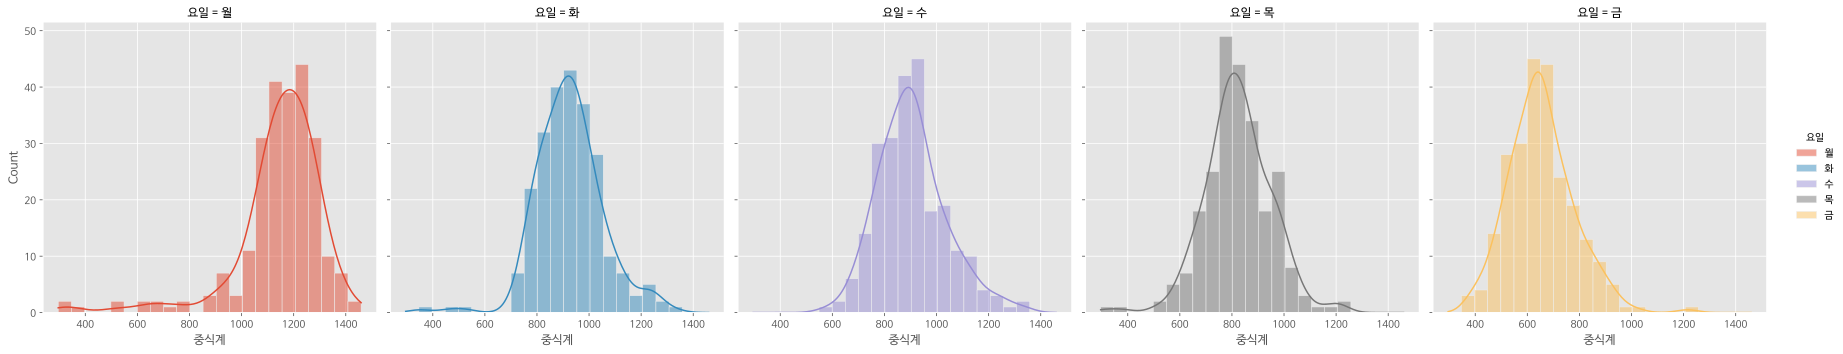

In [15]:
g = sns.displot(data=train, x='중식계', hue='요일', col='요일', kde=True)

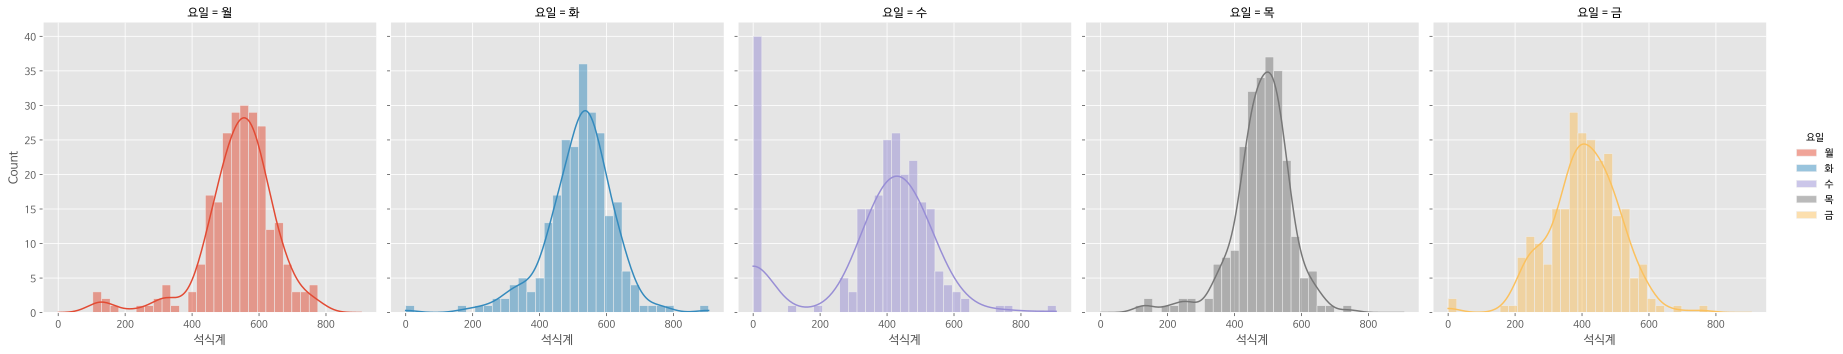

In [16]:
g = sns.displot(data=train, x='석식계', hue='요일', col='요일' ,kde=True)

## 본사정원수

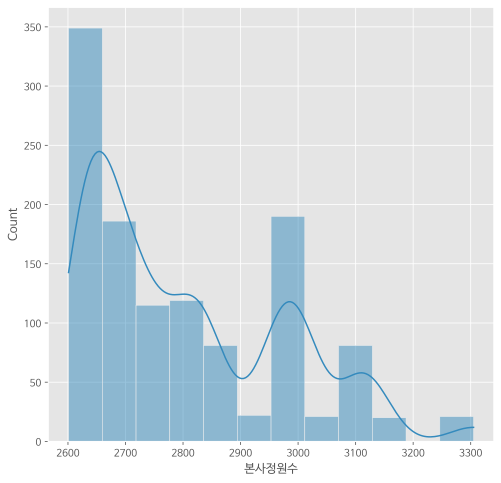

In [17]:
plt.figure(figsize=(8,8))
sns.histplot(data=train, x='본사정원수', kde=True)

In [18]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

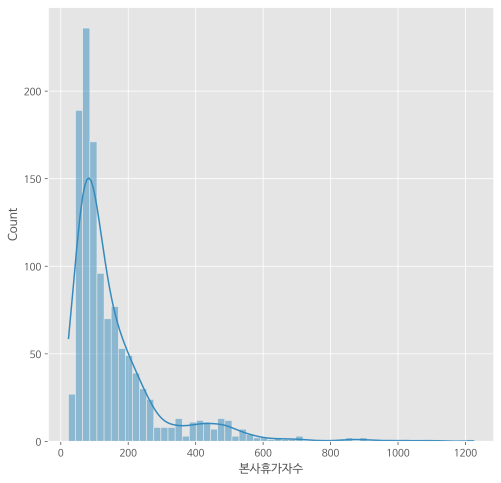

In [19]:
plt.figure(figsize=(8,8))
sns.histplot(data=train, x='본사휴가자수', kde=True)

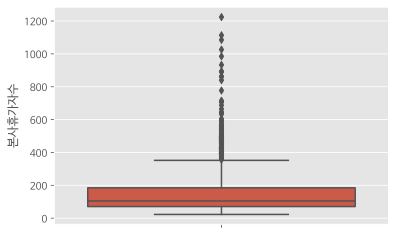

In [20]:
sns.boxplot(data=train,y='본사휴가자수')

In [21]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

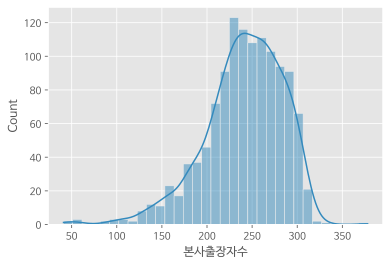

In [22]:
sns.histplot(data=train, x='본사출장자수', kde=True)

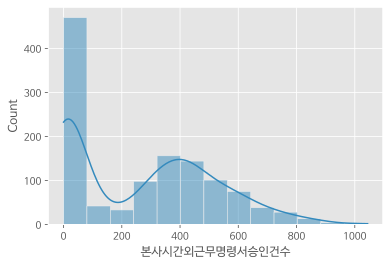

In [23]:
sns.histplot(data=train, x='본사시간외근무명령서승인건수', kde=True)

In [24]:
train.loc[train["본사시간외근무명령서승인건수"] == 0.0].shape

(213, 12)

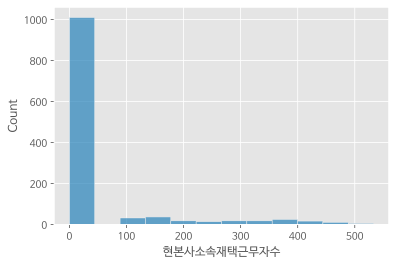

In [25]:
sns.histplot(data=train, x='현본사소속재택근무자수')

In [26]:
train.loc[train['현본사소속재택근무자수'] ==0.0].shape

(988, 12)

In [27]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [28]:
train["실제본사근무자수"] =train['본사정원수'] - (train['본사휴가자수'] + train['본사출장자수'] + train['현본사소속재택근무자수'])
test["실제본사근무자수"] =test['본사정원수'] - (test['본사휴가자수'] + test['본사출장자수'] + test['현본사소속재택근무자수'])

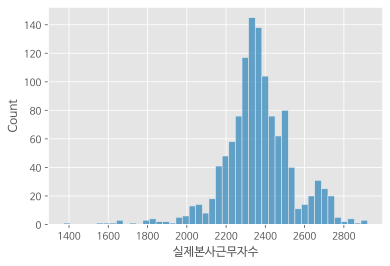

In [29]:
sns.histplot(data=train, x='실제본사근무자수')

In [30]:
train['요일'] = train['요일'].map({"월" : 0, "화" : 1, "수" : 2, "목" : 3, "금" : 4})
test['요일'] = test['요일'].map({"월" : 0, "화" : 1, "수" : 2, "목" : 3, "금" : 4})

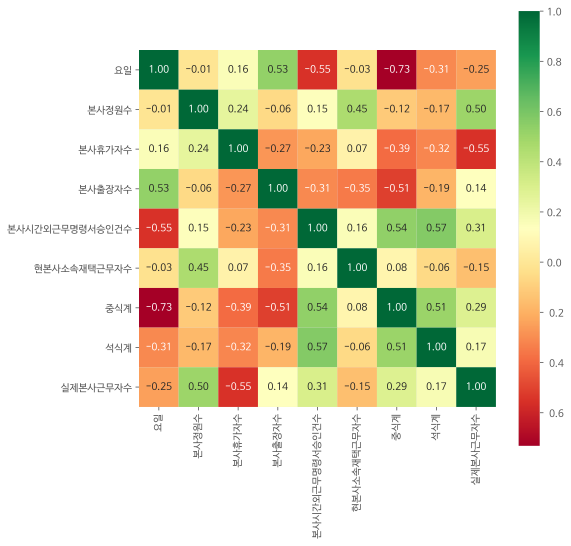

In [31]:
corr  = train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, fmt='.2f', cmap="RdYlGn")

# 데이터 전처리

In [240]:
path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/cafeteria/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [241]:
train['일자'] = pd.to_datetime(train['일자'])
train['연도'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day

test['일자'] = pd.to_datetime(test['일자'])
test['연도'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day

In [242]:
train["실제본사근무자수"] =train['본사정원수'] - (train['본사휴가자수'] + train['현본사소속재택근무자수'])
test["실제본사근무자수"] =test['본사정원수'] - (test['본사휴가자수'] + test['현본사소속재택근무자수'])

In [243]:
train['요일'] = train['요일'].map({"월" :1 , "화" : 2, "수" : 3, "목" : 4, "금" : 5})
test['요일'] = test['요일'].map({"월" : 1, "화" : 2, "수" : 3, "목" : 4, "금" : 5})

In [244]:
#요일을 석식 rank에 맞춰 mapping(석식계가 0인 데이터 제외한 랭크)
weekday_rankdinner ={
    1:1,
    2:2,
    3:4,
    4:3,
    5:5
}

train['요일(석식랭크)'] = train['요일'].map(weekday_rankdinner)
test['요일(석식랭크)'] = test['요일'].map(weekday_rankdinner)

In [245]:
#재택근무자가 0인날
train['재택근무자수제로'] = np.nan
train.loc[train["현본사소속재택근무자수"] == 0.0, "재택근무자수제로"] = 1.0
train.loc[train["현본사소속재택근무자수"] != 0.0, "재택근무자수제로"] = 0.0

test['재택근무자수제로'] = np.nan
test.loc[test["현본사소속재택근무자수"] == 0.0, "재택근무자수제로"] = 1.0
test.loc[test["현본사소속재택근무자수"] != 0.0, "재택근무자수제로"] = 0.0

In [246]:
#본사시간외근무명령서승인건수 0인날

train['승인건수제로'] =np.nan
train.loc[train['본사시간외근무명령서승인건수'] == 0.0, "승인건수제로"] = 1.0
train.loc[train['본사시간외근무명령서승인건수'] != 0.0, "승인건수제로"] = 0.0

test['승인건수제로'] =np.nan
test.loc[test['본사시간외근무명령서승인건수'] == 0.0, "승인건수제로"] = 1.0
test.loc[test['본사시간외근무명령서승인건수'] != 0.0, "승인건수제로"] = 0.0

In [247]:
# #범주화
# def cut_data(df, column, n):
#   qcut_data = pd.qcut(df[column], q=n).unique().sort_values()
#   for i in range(n):
#     if i == n-1:
#       df.loc[(qcut_data[i].left < df[column]), column] = i
#     else : 
#       df.loc[(qcut_data[i].left < df[column]) & (df[column] <= qcut_data[i].right), column] = i

# categorical_columns = ["본사휴가자수","본사출장자수","본사시간외근무명령서승인건수"]

# for df in [train, test]:
#   for column in categorical_columns:
#     cut_data(df, column, 5)

In [213]:
# #Label encoding
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit_transform()

# Scaling

In [214]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scale_train = train[["요일", "본사정원수","본사휴가자수","본사출장자수","본사시간외근무명령서승인건수","현본사소속재택근무자수","연도","월","일","실제본사근무자수"]]
# scale_test = test[["요일", "본사정원수","본사휴가자수","본사출장자수","본사시간외근무명령서승인건수","현본사소속재택근무자수","연도","월","일","실제본사근무자수"]]
# scale_train_columns = scale_train.columns
# scale_test_columns = scale_test.columns

# scale_train = scaler.fit_transform(scale_train)
# scale_test = scaler.transform(scale_test)

In [215]:
# scale_train =  pd.DataFrame(scale_train, columns=scale_train_columns)
# scale_test =  pd.DataFrame(scale_test, columns=scale_test_columns)

# 모델

In [216]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도,월,일,실제본사근무자수,요일(석식랭크),재택근무자수제로,승인건수제로
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1,2551.0,1,1.0,0.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2,2551.0,2,1.0,0.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3,2545.0,4,1.0,0.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4,2497.0,3,1.0,0.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5,2323.0,5,1.0,0.0


In [249]:
from sklearn.model_selection import train_test_split
lunch_columns = ['요일','본사시간외근무명령서승인건수','월','일','실제본사근무자수',"본사출장자수",'재택근무자수제로','승인건수제로']
dinner_columns = ['요일(석식랭크)','본사시간외근무명령서승인건수','월','일',"본사출장자수",'실제본사근무자수','승인건수제로']

X_lunch = train[lunch_columns]
X_dinner = train[dinner_columns]

y_lunch = train['중식계']
y_dinner = train['석식계']

test_lunch = test[lunch_columns]
test_dinner = test[dinner_columns]

#lunch
X1_train, X1_val, y1_train, y1_val = train_test_split(X_lunch, y_lunch, test_size=0.2, random_state=42,shuffle = True)

#dinner
X2_train, X2_val, y2_train, y2_val = train_test_split(X_dinner, y_dinner, test_size=0.2, random_state=42, shuffle=True)

print("중식계 : ")
print(X1_train.shape, y1_train.shape)
print(X1_val.shape, y1_val.shape)
print()
print("석식계 : ")
print(X2_train.shape, y2_train.shape)
print(X2_val.shape, y2_val.shape)

중식계 : 
(964, 8) (964,)
(241, 8) (241,)

석식계 : 
(964, 7) (964,)
(241, 7) (241,)


In [91]:
!pip install catboost

In [92]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

# rf_model1 = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1,criterion="mae")
# gb_model1 = GradientBoostingRegressor(n_estimators=300, random_state=42,criterion="mae")
# lgbm_model1 = LGBMRegressor(n_estimators=300, n_jobs=-1, random_state=42,objective='MAE',)
# xgb_model1 = XGBRegressor(n_estimators=300, random_state=42, n_jobs=-1,eval_metric='mae')
# cat_model1 = CatBoostRegressor(objective="MAE")

# rf_model2 = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1,criterion="mae")
# gb_model2 = GradientBoostingRegressor(n_estimators=300, random_state=42,criterion="mae")
# lgbm_model2 = LGBMRegressor(n_estimators=300, n_jobs=-1, random_state=42,objective='MAE')
# xgb_model2 = XGBRegressor(n_estimators=300, random_state=42, n_jobs=-1,eval_metric='mae')
# cat_model2 = CatBoostRegressor(objective="MAE")

# models1 = [rf_model1, gb_model1, lgbm_model1, xgb_model1, cat_model1]
# models2 = [rf_model2, gb_model2, lgbm_model2, xgb_model2, cat_model2]

In [251]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

rf_model1 = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1, criterion='mae')
gb_model1 = GradientBoostingRegressor(n_estimators=300, random_state=42,criterion="mae")
lgbm_model1 = LGBMRegressor(n_estimators=300, n_jobs=-1, random_state=42,objective='MAE')
xgb_model1 = XGBRegressor(n_estimators=300, random_state=42, n_jobs=-1, eval_metric='mae')
cat_model1 = CatBoostRegressor(objective='MAE',loss_function='MAE')

rf_model2 = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1,criterion='mae')
gb_model2 = GradientBoostingRegressor(n_estimators=300, random_state=42,criterion="mae")
lgbm_model2 = LGBMRegressor(n_estimators=300, n_jobs=-1, random_state=42,objective='MAE')
xgb_model2 = XGBRegressor(n_estimators=300, random_state=42, n_jobs=-1, eval_metric='mae')
cat_model2 = CatBoostRegressor(objective='MAE',loss_function='MAE')

models1 = [rf_model1, gb_model1, lgbm_model1, xgb_model1, cat_model1]
models2 = [rf_model2, gb_model2, lgbm_model2, xgb_model2, cat_model2]

In [262]:
from sklearn.metrics import mean_absolute_error as MAE

for model1 in models1 :
  if model1.__class__.__name__ == "CatBoostRegressor":
    model1.fit(X1_train, y1_train, verbose=200)
  else : 
    model1.fit(X1_train, y1_train)
  pred_1 = model1.predict(X1_val)

  print("중식계 {} MAE : {} ".format(model1.__class__.__name__, MAE(y1_val, pred_1)))

print()
print("------------------------")
for model2 in models2 :
  if model2.__class__.__name__ == "CatBoostRegressor":
    model2.fit(X2_train, y2_train, verbose=200)
  else : 
    model2.fit(X2_train, y2_train)
  pred_2 = model2.predict(X2_val)
  print("석식계 {} MAE : {} ".format(model2.__class__.__name__, MAE(y2_val, pred_2)))

중식계 RandomForestRegressor MAE : 79.13673582295988 
중식계 GradientBoostingRegressor MAE : 79.0247894555879 
중식계 LGBMRegressor MAE : 76.8186754365652 
[07:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
중식계 XGBRegressor MAE : 77.2786812050214 
0:	learn: 164.8358704	total: 1.55ms	remaining: 1.55s
200:	learn: 59.6168799	total: 251ms	remaining: 999ms
400:	learn: 50.1588729	total: 499ms	remaining: 746ms
600:	learn: 44.3995688	total: 745ms	remaining: 494ms
800:	learn: 40.5944909	total: 1.01s	remaining: 250ms
999:	learn: 37.8583263	total: 1.26s	remaining: 0us
중식계 CatBoostRegressor MAE : 77.31563192277481 

------------------------
석식계 RandomForestRegressor MAE : 61.57020746887966 
석식계 GradientBoostingRegressor MAE : 65.39016663205751 
석식계 LGBMRegressor MAE : 59.96866389874835 
[07:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
석식계 XGBRegressor MAE

# 튜닝

In [250]:
#가장 MAE 점수가 좋았던 catboost 모델을 튜닝
from sklearn.model_selection import GridSearchCV

cat_lunch = CatBoostRegressor(objective="MAE",loss_function= 'MAE')
cat_dinner = CatBoostRegressor(objective="MAE",loss_function= 'MAE')

param_grid = {
    "n_estimators" :[1000,2000,2500],
    "random_seed" : [42]
}

gs1 = GridSearchCV(cat_lunch, param_grid, scoring="neg_mean_absolute_error", n_jobs=-1,cv=5)
gs1.fit(X_lunch,y_lunch,verbose=400)
print("중식계 : ")
print(gs1.best_score_)
print(gs1.best_params_)

gs2 = GridSearchCV(cat_dinner, param_grid, scoring="neg_mean_absolute_error", n_jobs=-1,cv=5)
gs2.fit(X_dinner,y_dinner,verbose=400)
print("석식계 : ")
print(gs2.best_score_)
print(gs2.best_params_)

0:	learn: 163.8238331	total: 1.53ms	remaining: 1.53s
400:	learn: 51.9660946	total: 533ms	remaining: 795ms
800:	learn: 43.4201477	total: 1.07s	remaining: 266ms
999:	learn: 40.8084256	total: 1.37s	remaining: 0us
중식계 : 
-87.24729157500944
{'n_estimators': 1000, 'random_seed': 42}
0:	learn: 97.1904223	total: 1.51ms	remaining: 1.51s
400:	learn: 43.4403154	total: 548ms	remaining: 818ms
800:	learn: 35.6508328	total: 1.11s	remaining: 276ms
999:	learn: 33.6951643	total: 1.38s	remaining: 0us
석식계 : 
-74.10413935450258
{'n_estimators': 1000, 'random_seed': 42}


In [253]:
print(gs1.best_estimator_.get_params())
print(gs2.best_estimator_.get_params())

{'loss_function': 'MAE', 'random_seed': 42, 'n_estimators': 1000, 'objective': 'MAE'}
{'loss_function': 'MAE', 'random_seed': 42, 'n_estimators': 1000, 'objective': 'MAE'}


In [254]:
y1_pred = gs1.predict(test_lunch)
y2_pred = gs2.predict(test_dinner)

In [256]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/cafeteria/sample_submission.csv")
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [257]:
submission["중식계"] = y1_pred
submission['석식계'] = y2_pred

In [258]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/cafeteria/"
sub_name = "cat_tuning_submission9.csv"
submission.to_csv("{}{}".format(sub_path, sub_name), index=False)

# Feature Importance

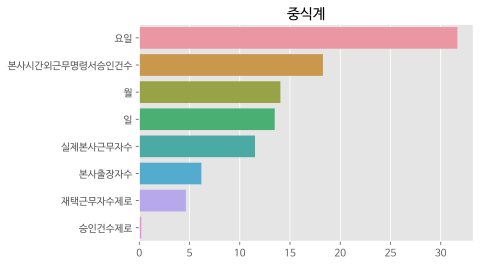

In [260]:
best_lunch_model = gs1.best_estimator_
cat_model1_feature_importance = pd.Series(best_lunch_model.get_feature_importance()).sort_values(ascending=False).values
sns.barplot(y=X_lunch.columns, x=cat_model1_feature_importance)
plt.title("중식계")
plt.show()

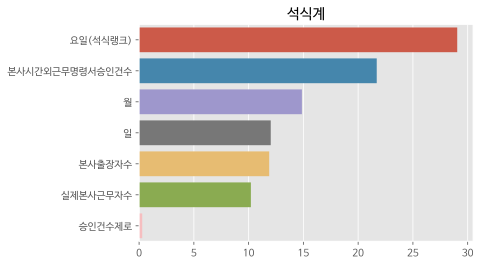

In [261]:
best_dinner_model = gs2.best_estimator_
cat_model2_feature_importance = pd.Series(best_dinner_model.get_feature_importance()).sort_values(ascending=False).values
sns.barplot(y=X_dinner.columns, x=cat_model2_feature_importance)
plt.title("석식계")
plt.show()

In [ ]:
# def split_process(x):
#   temp = []
#   x = [word for word in x if word != ""]
#   for i in x:
#     if "(" in i and ":" in i and ")" in i :
#       continue
#     else:
#       temp.append(i)
  
#   return temp

In [ ]:
# for i in range(train['조식메뉴'].shape[0]):
#   row = train['조식메뉴'].str.split(" ")[i]
#   row = split_process(row)
  
#   print(row)


In [ ]:
# for i in range(test['조식메뉴'].shape[0]):
#   row = test['조식메뉴'].str.split(" ")[i]
#   row = split_process(row)
#   if len(row) != 7 :
#     print(row)